# hyperopt tutorial

Reference:
https://www.kaggle.com/ilialar/hyperparameters-tunning-with-hyperopt

<a id = 'toc'></a>    
[Table of contents](#toc)

1. [GridSearch](#grid)
2. [RandomSearch](#random)
3. [HyperOpt](#hyper)

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
X = dataset.data
y = dataset.target

In [4]:
X.shape

(442, 10)

In [5]:
y.shape

(442,)

In [6]:
X[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [7]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [10]:
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [12]:
type(X)

numpy.ndarray

In [8]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

random_state = 42

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, 
                                                   random_state = random_state)
kf = KFold(n_splits = 2, random_state = random_state)

In [9]:
from lightgbm.sklearn import LGBMRegressor

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
model = LGBMRegressor(random_state=random_state)

In [12]:
X.mean(axis = 0)

array([-3.63428493e-16,  1.30834257e-16, -8.04534920e-16,  1.28165452e-16,
       -8.83531559e-17,  1.32702421e-16, -4.57464634e-16,  3.77730150e-16,
       -3.83085422e-16, -3.41288202e-16])

In [13]:
X.std(axis = 0)

array([0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515,
       0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515])

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

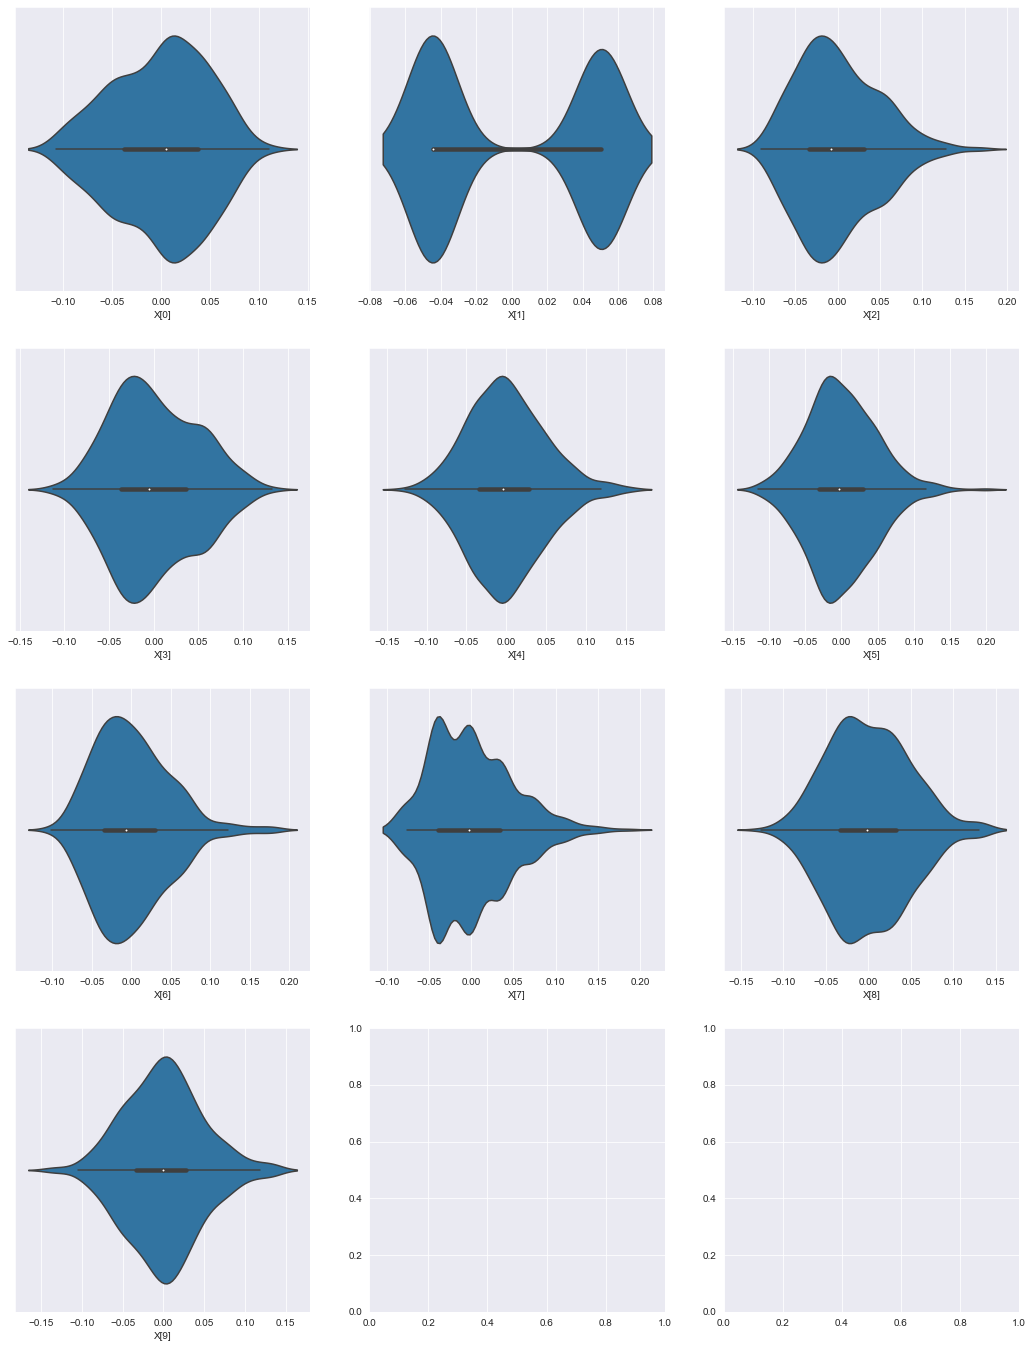

In [15]:
fig, axes = plt.subplots(4, 3, figsize = (18, 24))
axes = axes.ravel()

for i in range(X.shape[1]):
    sns.violinplot(X[:,i], ax = axes[i])
    axes[i].set_xlabel('X[{}]'.format(i))
    
plt.tight_layout
plt.show()

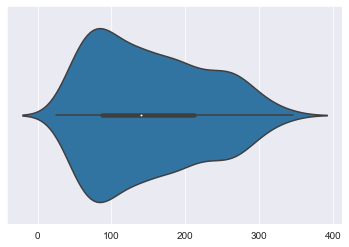

In [16]:
sns.violinplot(y)
plt.show()

In [17]:
%%time
s = -cross_val_score(model, train_X, train_y, cv = kf, scoring = 'neg_mean_squared_error', n_jobs = -1)

CPU times: user 48 ms, sys: 67 ms, total: 115 ms
Wall time: 2.3 s


In [18]:
s

array([3819.49585263, 3244.6685853 ])

In [19]:
s.mean()

3532.0822189641976

[Back to top](#toc)

<a id = 'grid'></a>

## 1. GridSearch

Trying parameter sets one by one.
1. Slow - exhaustive search
2. Only discrete values - miss optimal values not on the grid
3. Combin the above, knowledge of where the optimal combo sits is required to be efficient.

In [20]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [21]:
# 3x8x5 = 120 combo
param_grid = {'learning_rate': np.logspace(-3, -1, 3),
             'max_depth': np.linspace(5, 12, 8, dtype = int),
             'n_estimators': np.linspace(800, 1200, 5, dtype = int),
             'random_state': [random_state]}

In [22]:
gs=GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', n_jobs = -1, cv = kf)

In [23]:
%%time
gs.fit(train_X, train_y)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 1.92 s, sys: 82 ms, total: 2.01 s
Wall time: 24.7 s


GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=N...
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': array([0.001, 0.01 , 0.1  ]),
                         'max_depth': array([ 5,  6,  7,  8

In [24]:
gs.best_score_

-3320.630065642697

In [25]:
gs.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 800,
 'random_state': 42}

In [26]:
import pandas as pd

In [27]:
gs_results_df = pd.DataFrame(np.transpose([-gs.cv_results_['mean_test_score'], 
 gs.cv_results_['param_learning_rate'].data,
 gs.cv_results_['param_n_estimators'].data,
 gs.cv_results_['param_max_depth'].data]), 
 columns=['score', 'learning_rate', 'n_estimators', 'max_depth'])

In [28]:
gs_results_df.head()

,score,learning_rate,n_estimators,max_depth
0,3943.78,0.001,800,5
1,3830.53,0.001,900,5
2,3740.94,0.001,1000,5
3,3665.47,0.001,1100,5
4,3604.25,0.001,1200,5


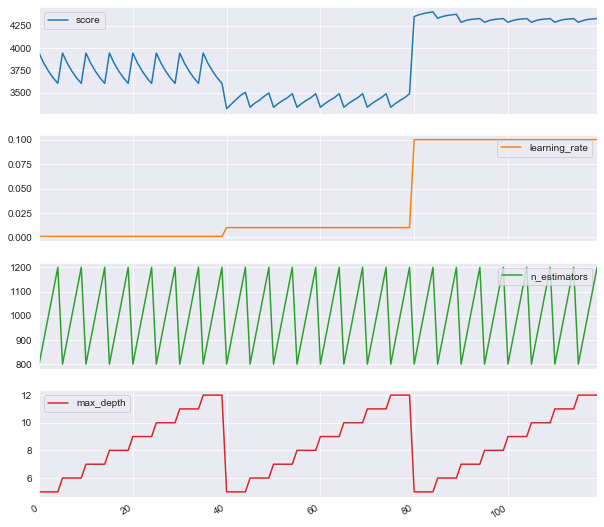

In [88]:
gs_results_df.plot(subplots=True, figsize=(10,10))
plt.show()

[Back to top](#toc)


<a id = 'random'></a>
## 2. RandomSearch

Advantage:
1. Variate all parameters for each search, not wasting time on meaningless parameters
2. Generally faster
3. Continuous

Disadvantage:
1. Independent steps that doesn't learn from previous result
2. May fail to find gloabl optimum

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [30]:
param_grid_rand = {'learning_rate': np.logspace(-5, 0, 100),
                  'max_depth': randint(2, 20),
                  'n_estimators': randint(100, 2000),
                  'random_state': [random_state]}

In [31]:
rs = RandomizedSearchCV(model, param_grid_rand, scoring='neg_mean_squared_error',
                        n_iter = 50,
                       cv = kf, n_jobs = -1, random_state = random_state)

In [32]:
%%time
rs.fit(train_X, train_y)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 1.59 s, sys: 107 ms, total: 1.69 s
Wall time: 13 s


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objec...
       7.05480231e-01, 7.92482898e-01, 8.90215085e-01, 1.00000000e+00]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a221155c0>,
         

In [33]:
rs.best_params_

{'learning_rate': 0.0047508101621027985,
 'max_depth': 19,
 'n_estimators': 829,
 'random_state': 42}

In [34]:
rs.best_score_

-3200.9242106136335

In [35]:
rs_result_df = pd.DataFrame(np.transpose([-rs.cv_results_['mean_test_score'], 
                                          rs.cv_results_['param_n_estimators'].data,
                                         rs.cv_results_['param_learning_rate'].data,
                                         rs.cv_results_['param_max_depth'].data]),
                           columns = ['score', 'n_estimators', 'leaning_rate', 'max_depth'])

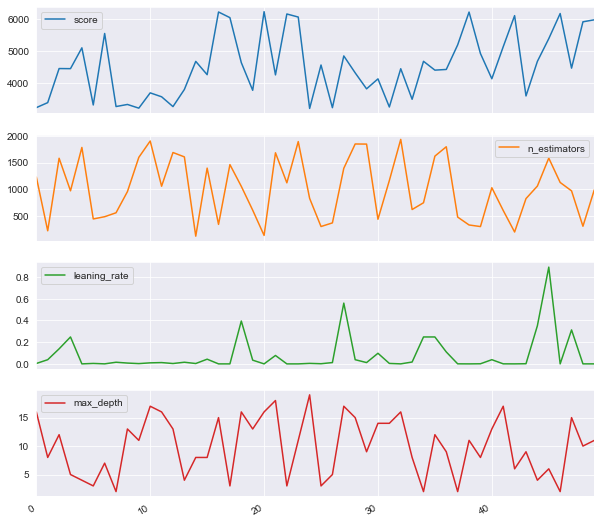

In [36]:
rs_result_df.plot(subplots = True, figsize=(10,10))
plt.show()

[Back to Top](#toc)

<a id = 'hyper'></a>

## Hyperopt

In [37]:
from hyperopt import fmin, tpe, hp, anneal, Trials

In [38]:
# function to minimize: valication scores of a model
def gb_mse_cv(params, random_state = random_state, cv = kf, X = train_X, y = train_y):
    params = {'n_estimators': int(params['n_estimators']),
             'max_depth': int(params['max_depth']),
             'learning_rate': params['learning_rate']}
    model = LGBMRegressor(random_state = random_state, **params)
    score = -cross_val_score(model, X, y, cv=cv, 
                             scoring = 'neg_mean_squared_error', 
                             n_jobs = -1).mean()
    return score

### 3.1. TPE ( Tree-structured Parzen Estimator)

Bayesian approach for optimization:

1. Random parameter x0
2. evaluate objective function F(xt)
3. probablity model P(F|xt)
4. choose next xt+1 based on probablity model and acquisition function
5. repeat step 2-4 until stop criteria is satisfied.

In [39]:
space = {'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
        'max_depth': hp.quniform('max_depth', 2, 20, 1),
        'learning_rate': hp.loguniform('learning_rate', -5, 0)}

In [40]:
trials = Trials()

In [42]:
n_iter = 50
best = fmin(fn = gb_mse_cv,
           space = space,
           algo = tpe.suggest, #optimization algorithm
           max_evals = n_iter, #max number of iterations
           trials = trials, #logging
           rstate = np.random.RandomState(random_state) #reproducibility
           )

100%|██████████| 50/50 [00:13<00:00,  5.02it/s, best loss: 3186.7910608402444]


In [47]:
model = LGBMRegressor(random_state = random_state, 
                     n_estimators = int(best['n_estimators']),
                     max_depth = int(best['max_depth']),
                     learning_rate = best['learning_rate']
                     )
model.fit(train_X, train_y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.026975706032324936,
              max_depth=20, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=168, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [48]:
tpe_test_score = mean_squared_error(test_y, model.predict(test_X))

In [49]:
gb_mse_cv(best)

3186.7910608402444

In [50]:
tpe_results = np.array([[x['result']['loss'],
                        x['misc']['vals']['learning_rate'][0],
                        x['misc']['vals']['max_depth'][0],
                        x['misc']['vals']['n_estimators'][0]]
                       for x in trials.trials])

In [51]:
tpe_results_df = pd.DataFrame(tpe_results,
                             columns = ['score', 'learning_rate','max_depth', 'n_estimators'])

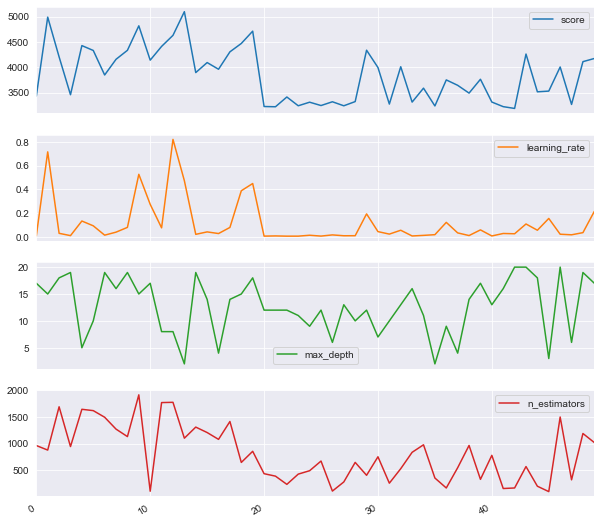

In [54]:
tpe_results_df.plot(subplots = True, figsize = (10, 10))
plt.show()

### 3.2. Simulated Anneal

1. Generate random parameter x,
2. Evaluate objective function F(x),
3. Generate xi randomly in some neighbourhood of x*,
4. Evaluate F(xi),
5. Update X according some rules
6. Repeat 3-5 until one of the stop criteria is satisfied

In [57]:
%%time

space = {'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
        'max_depth': hp.quniform('max_depth', 2, 20, 1),
        'learning_rate': hp.loguniform('learning_rate', -5, 0)
        }

trials = Trials()

best = fmin( fn = gb_mse_cv,
           space = space,
           algo = anneal.suggest,
           max_evals = n_iter,
           trials = trials,
           rstate = np.random.RandomState(random_state)
           )

model = LGBMRegressor( n_estimators = int(best['n_estimators']),
                     max_depth = int(best['max_depth']),
                     learning_rate = best['learning_rate'])
                     
model.fit(train_X, train_y)

sa_test_score = mean_squared_error(test_y, model.predict(test_X))

print (gb_mse_cv(best))

100%|██████████| 50/50 [00:08<00:00,  6.33it/s, best loss: 3204.336256862443] 
3204.336256862443
CPU times: user 1.59 s, sys: 158 ms, total: 1.74 s
Wall time: 9.11 s


In [1]:
import numpy as np

In [2]:
np.log(10)

2.302585092994046

In [3]:
np.log(10.5)

2.3513752571634776

In [4]:
np.log(1000.5)

6.908255154023788

In [6]:
np.exp(np.log(9.5))

9.500000000000002

In [15]:
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(x):
    return {
        'loss': x ** 2,
        'status': STATUS_OK,
        # -- store other results like this
        'eval_time': time.time(),
        'other_stuff': {'type': None, 'value': [0, 1, 2]},
        # -- attachments are handled differently
        'attachments':
            {'time_module': pickle.dumps(time.time)}
        }
trials = Trials()
best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print (best)

100%|██████████| 100/100 [00:00<00:00, 299.53it/s, best loss: 9.965481769085168e-06]
{'x': 0.003156815130647528}


In [25]:
type(trials.trials)

list

In [26]:
trials.trials[0]

{'state': 2,
 'tid': 0,
 'spec': None,
 'result': {'loss': 65.93338767929268,
  'status': 'ok',
  'eval_time': 1572922276.6573,
  'other_stuff': {'type': None, 'value': [0, 1, 2]}},
 'misc': {'tid': 0,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'x': [0]},
  'vals': {'x': [-8.11993766474181]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2019, 11, 5, 2, 51, 16, 657000),
 'refresh_time': datetime.datetime(2019, 11, 5, 2, 51, 16, 657000)}

In [14]:
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(x):
    return {'loss': x ** 2, 'status': STATUS_OK }

best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)

print (best)

100%|██████████| 100/100 [00:00<00:00, 306.53it/s, best loss: 2.159926799025203e-05]
{'x': 0.004647501263071591}


In [33]:
import pprint

In [38]:
%time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
fspace = {
    'x': hp.uniform('x', -5, 5)
}
def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
trials = Trials()
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=50, trials=trials)
print ('best:', best)
print ('trials:')
for trial in trials.trials[:2]:
    pprint.pprint (trial)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
100%|██████████| 50/50 [00:00<00:00, 329.04it/s, best loss: 0.00878902880100993] 
best: {'x': 0.09374982027188068}
trials:
{'book_time': datetime.datetime(2019, 11, 6, 21, 35, 26, 711000),
 'exp_key': None,
 'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
          'idxs': {'x': [0]},
          'tid': 0,
          'vals': {'x': [-2.9735419234988694]},
          'workdir': None},
 'owner': None,
 'refresh_time': datetime.datetime(2019, 11, 6, 21, 35, 26, 712000),
 'result': {'loss': 8.841951570805357, 'status': 'ok'},
 'spec': None,
 'state': 2,
 'tid': 0,
 'version': 0}
{'book_time': datetime.datetime(2019, 11, 6, 21, 35, 26, 713000),
 'exp_key': None,
 'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
          'idxs': {'x': [1]},
          'tid': 1,
          'vals': {'x': [-3.260012585217482]},
          'workdir': None},
 'owner': None,
 'refresh_time': datetime.datetime(2019, 11, 6, 21, 35, 26, 714000)

In [29]:
len(trials)

50

In [41]:
import hyperopt.pyll.stochastic


In [42]:
space = hp.quniform('n_estimators',9.5, 3000.5, 1 )
s = hyperopt.pyll.stochastic.sample(space) 
print (s)

2837.0


In [43]:
space = hp.quniform('n_estimators',np.log(9.5), np.log(3000.5), 1 )
s = hyperopt.pyll.stochastic.sample(space) 
print (s)

7.0


In [44]:
space = hp.qloguniform('n_estimators',np.log(9.5), np.log(3000.5), 1 )
s = hyperopt.pyll.stochastic.sample(space) 
print (s)

53.0


In [47]:
round(9.5 /1) * 1

10

In [48]:
9.5/1

9.5

In [56]:
round(np.exp(np.log(10))/1)*1

10.0

In [ ]:
round(exp(uniform(low, high)) / q) * q

In [ ]:
round(exp(np.log(9.5) /))

In [ ]:
round(uniform(low, high) / q) * q